In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization

In [3]:
def load_and_preprocess_data(filename):
    # Load and transpose data
    data = pd.read_csv(filename)
    data = data.transpose()
    data.columns = data.iloc[0]  # Set the first row as column headers
    data = data[1:]  # Drop the first row (header row)

    # Select and convert the '4. close' data
    close_prices = data['4. close'].astype(float).values.reshape(-1, 1)
    
    # Normalize the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    normalized_data = scaler.fit_transform(close_prices)
    
    return normalized_data, scaler

# Assume file is named 'AAPL_stock_data_alpha.csv'
data, scaler = load_and_preprocess_data('AAPL_stock_data_alpha.csv')

In [4]:
def create_dataset(data, look_back=60):
    X, Y = [], []
    for i in range(len(data) - look_back - 1):
        a = data[i:(i + look_back), 0]
        X.append(a)
        Y.append(data[i + look_back, 0])
    return np.array(X), np.array(Y)

X, Y = create_dataset(data)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [7]:
def build_vggnet(input_shape, dropout_rate=0.5):
    model = Sequential([
        Conv1D(64, 3, padding='same', activation='relu', input_shape=input_shape),
        MaxPooling1D(2),
        Conv1D(128, 3, padding='same', activation='relu'),
        MaxPooling1D(2),
        Conv1D(256, 3, padding='same', activation='relu'),
        MaxPooling1D(2),
        Flatten(),
        Dense(4096, activation='relu'),
        Dropout(0.5),
        Dense(4096, activation='relu'),
        Dropout(0.5),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])
    return model

In [8]:
model = build_vggnet((X_train.shape[1], 1), dropout_rate=0.6)
model.fit(X_train, Y_train, epochs=50, batch_size=32, validation_split=0.2)

C:\Users\jatav\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 31s 231ms/step - loss: 0.0197 - mean_squared_error: 0.0197 - val_loss: 5.5550e-04 - val_mean_squared_error: 5.5550e-04
Epoch 2/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 29s 232ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 2.2785e-04 - val_mean_squared_error: 2.2785e-04
Epoch 3/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 28s 231ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 4.2206e-04 - val_mean_squared_error: 4.2206e-04
Epoch 4/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 29s 236ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 9.9261e-04 - val_mean_squared_error: 9.9261e-04
Epoch 5/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 29s 238ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 7.6190e-04 - val_mean_squared_error: 7.6190e-04
Epoch 6/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 28s 230ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 6.3309e-04 - val_mean_squared_error: 6.3309e-04
Epoch 7/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 29s 23

123/123 ━━━━━━━━━━━━━━━━━━━━ 29s 237ms/step - loss: 6.5347e-04 - mean_squared_error: 6.5347e-04 - val_loss: 1.4530e-04 - val_mean_squared_error: 1.4530e-04
Epoch 43/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 29s 232ms/step - loss: 4.5925e-04 - mean_squared_error: 4.5925e-04 - val_loss: 2.1672e-04 - val_mean_squared_error: 2.1672e-04
Epoch 44/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 30s 242ms/step - loss: 6.0762e-04 - mean_squared_error: 6.0762e-04 - val_loss: 2.6936e-04 - val_mean_squared_error: 2.6936e-04
Epoch 45/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 31s 250ms/step - loss: 5.2427e-04 - mean_squared_error: 5.2427e-04 - val_loss: 6.0281e-04 - val_mean_squared_error: 6.0281e-04
Epoch 46/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 31s 253ms/step - loss: 5.9729e-04 - mean_squared_error: 5.9729e-04 - val_loss: 1.7622e-04 - val_mean_squared_error: 1.7622e-04
Epoch 47/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 31s 248ms/step - loss: 8.2675e-04 - mean_squared_error: 8.2675e-04 - val_loss: 1.3577e-04 - val_mean_squared_error: 1.3577e-04
Epoc

In [22]:
from sklearn.metrics import mean_absolute_error, r2_score

# Calculate additional performance metrics
mae = mean_absolute_error(Y_test, predictions)
r2 = r2_score(Y_test, predictions)

print("Mean Absolute Error (MAE):", mae)
print("R-squared (R²):", r2)

Mean Absolute Error (MAE): 0.011719762155342896
R-squared (R²): 0.9853724508701369


In [15]:
import matplotlib.pyplot as plt
def plot_predictions(actual, predicted, start=0, end=100):
    plt.figure(figsize=(10, 5))
    if end > len(actual):  # Ensure the end index does not exceed the data length
        end = len(actual)
    
    plt.plot(range(start, end), actual[start:end], label='Actual Prices', color='blue')
    plt.plot(range(start, end), predicted[start:end], label='Predicted Prices', color='red', linestyle='--')
    plt.title('Comparison of Actual and Predicted Values (Zoomed In)')
    plt.xlabel('Sample Index')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()

39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step


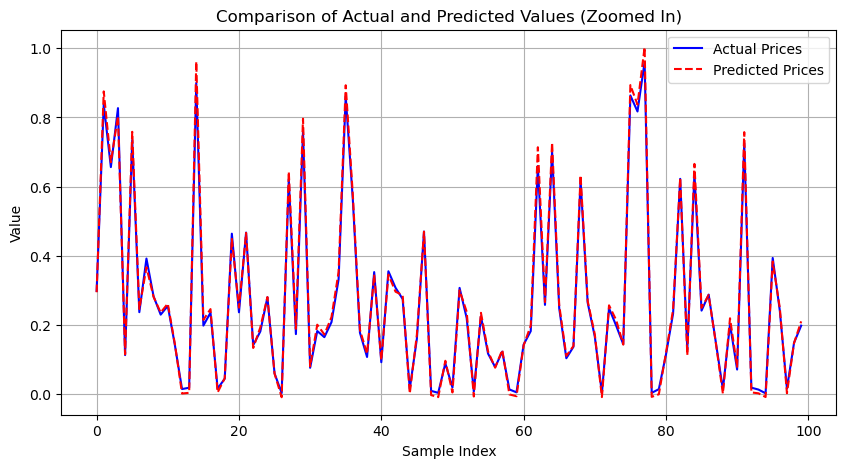

In [16]:
predictions = model.predict(X_test).flatten()  # Flatten predictions if they are not already
plot_predictions(Y_test, predictions, start=0, end=100)  # Zoom in on the first 100 points

In [18]:
model = build_vggnet((X_train.shape[1], 1))
model.fit(X_train, Y_train, epochs=20, batch_size=32, validation_split=0.2)

C:\Users\jatav\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 32s 234ms/step - loss: 0.0289 - mean_squared_error: 0.0289 - val_loss: 5.3685e-04 - val_mean_squared_error: 5.3685e-04
Epoch 2/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 28s 229ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0012 - val_mean_squared_error: 0.0012
Epoch 3/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 29s 232ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 2.8676e-04 - val_mean_squared_error: 2.8676e-04
Epoch 4/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 28s 231ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 5.7049e-04 - val_mean_squared_error: 5.7049e-04
Epoch 5/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 30s 240ms/step - loss: 8.4555e-04 - mean_squared_error: 8.4555e-04 - val_loss: 1.4145e-04 - val_mean_squared_error: 1.4145e-04
Epoch 6/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 32s 259ms/step - loss: 6.6007e-04 - mean_squared_error: 6.6007e-04 - val_loss: 1.2539e-04 - val_mean_squared_error: 1.2539e-04
Epoch 7/20
123/123 ━━━━━━━━━━━━━━━━━━━

In [21]:
from sklearn.metrics import mean_absolute_error, r2_score

# Calculate additional performance metrics
mae = mean_absolute_error(Y_test, predictions)
r2 = r2_score(Y_test, predictions)

print("Mean Absolute Error (MAE):", mae)
print("R-squared (R²):", r2)

Mean Absolute Error (MAE): 0.011719762155342896
R-squared (R²): 0.9853724508701369


In [19]:
def plot_predictions(actual, predicted, start=0, end=100):
    plt.figure(figsize=(10, 5))
    if end > len(actual):  # Ensure the end index does not exceed the data length
        end = len(actual)
    
    plt.plot(range(start, end), actual[start:end], label='Actual Prices', color='blue')
    plt.plot(range(start, end), predicted[start:end], label='Predicted Prices', color='red', linestyle='--')
    plt.title('Comparison of Actual and Predicted Values (Zoomed In)')
    plt.xlabel('Sample Index')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()

39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step


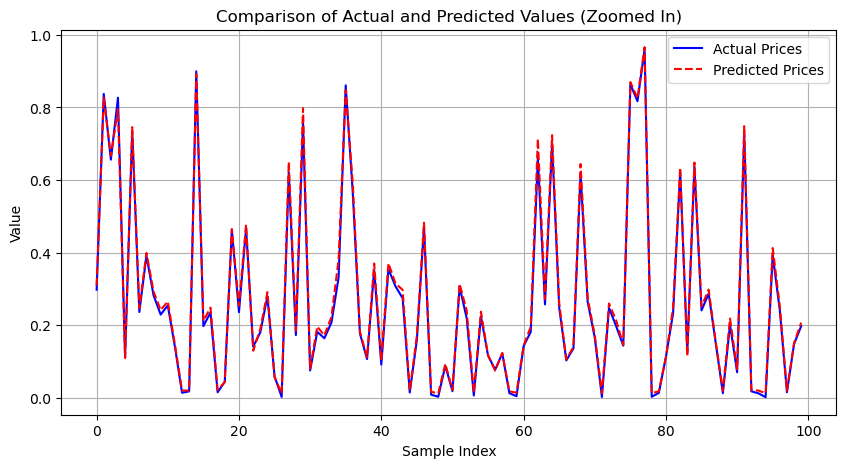

In [20]:
predictions = model.predict(X_test).flatten()  # Flatten predictions if they are not already
plot_predictions(Y_test, predictions, start=0, end=100)  # Zoom in on the first 100 points